In [72]:
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np 
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u

import plotly
import plotly.graph_objs as go

In [39]:
act_clus_path = 'Data/DR5_cluster-catalog_v1.0b3.fits'
table_act_clus = Table.read(act_clus_path )

df_act_clus = table_act_clus.to_pandas()

df_act_clus.columns

Index(['name', 'RADeg', 'decDeg', 'SNR', 'y_c', 'err_y_c', 'fixed_SNR',
       'fixed_y_c', 'fixed_err_y_c', 'template', 'tileName', 'redshift',
       'redshiftErr', 'redshiftType', 'redshiftSource', 'M500', 'M500_errPlus',
       'M500_errMinus', 'M500Cal', 'M500Cal_errPlus', 'M500Cal_errMinus',
       'M200m', 'M200m_errPlus', 'M200m_errMinus', 'M500Uncorr',
       'M500Uncorr_errPlus', 'M500Uncorr_errMinus', 'M200mUncorr',
       'M200mUncorr_errPlus', 'M200mUncorr_errMinus', 'footprint_DESY3',
       'footprint_HSCs19a', 'footprint_KiDSDR4', 'zCluster_delta',
       'zCluster_errDelta', 'zCluster_source', 'RM', 'RM_LAMBDA',
       'RM_LAMBDA_ERR', 'RMDESY3', 'RMDESY3_LAMBDA_CHISQ',
       'RMDESY3_LAMBDA_CHISQ_E', 'CAMIRA', 'CAMIRA_N_mem', 'opt_RADeg',
       'opt_decDeg', 'opt_positionSource', 'notes', 'knownLens',
       'knownLensRefCode', 'warnings'],
      dtype='object')

In [13]:
df_act_clus.describe()

,RADeg,decDeg,SNR,y_c,err_y_c,fixed_SNR,fixed_y_c,fixed_err_y_c,redshift,redshiftErr,...,M200mUncorr_errMinus,zCluster_delta,zCluster_errDelta,RM_LAMBDA,RM_LAMBDA_ERR,RMDESY3_LAMBDA_CHISQ,RMDESY3_LAMBDA_CHISQ_E,CAMIRA_N_mem,opt_RADeg,opt_decDeg
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,...,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,151.193567,-11.682177,6.369942,0.949193,0.156436,6.148885,0.821111,0.135208,0.550965,0.011850,...,0.980084,-5.965902,-10.373440,-59.459191,-73.821786,-33.774595,-57.025730,-91.902926,140.961503,-14.515883
std,117.664528,24.306970,3.330914,0.667858,0.094686,3.290689,0.466707,0.036248,0.260175,0.014221,...,0.411524,32.667656,30.993106,72.546321,45.225033,81.888127,51.560543,31.202135,125.149443,29.641844
min,0.020896,-59.987040,4.018115,0.219650,0.050682,2.839576,0.278828,0.073262,0.035200,0.000000,...,0.455283,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,39.386235,-34.828811,4.562541,0.512456,0.092645,4.358696,0.548591,0.103023,0.354170,0.000000,...,0.745857,2.534181,0.260000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,35.014455,-37.065237
50%,144.342767,-2.252158,5.266181,0.763703,0.120747,5.109624,0.706092,0.132314,0.519816,0.008756,...,0.897895,4.378976,0.400000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,137.217258,-2.467603
75%,232.604297,8.957936,6.849921,1.212606,0.187983,6.635984,0.936574,0.163962,0.709455,0.022036,...,1.088242,6.724259,0.540000,-99.000000,-99.000000,50.658356,3.650176,-99.000000,228.444725,8.883055
max,359.988280,20.486048,54.337394,13.758792,0.590781,53.994840,5.965801,0.248546,1.910000,0.210000,...,6.916736,24.080538,3.240000,299.459351,31.172960,247.195816,178.029175,117.669000,359.993443,20.487511


In [19]:
hdul = fits.open(act_clus_path)
# hdul[1].header
hdul[1].header['TTYPE16']

'M500'

In [65]:
df_act_clus_small = df_act_clus[['RADeg', 'decDeg', 'redshift', 'M500']].copy()
df_act_clus_small.describe()

,RADeg,decDeg,redshift,M500
count,4195.000000,4195.000000,4195.000000,4195.000000
mean,151.193567,-11.682177,0.550965,2.621147
std,117.664528,24.306970,0.260175,1.092935
min,0.020896,-59.987040,0.035200,1.042072
25%,39.386235,-34.828811,0.354170,1.961358
50%,144.342767,-2.252158,0.519816,2.361268
75%,232.604297,8.957936,0.709455,2.937229
max,359.988280,20.486048,1.910000,13.442958


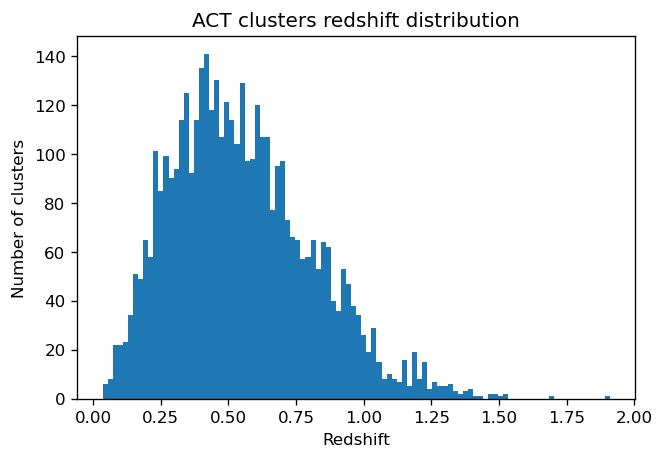

In [42]:
dpi = 120

plt.figure(dpi = dpi)
plt.hist(df_act_clus_small['redshift'], bins = 100);
plt.xlabel('Redshift')
plt.ylabel('Number of clusters')
plt.title('ACT clusters redshift distribution');

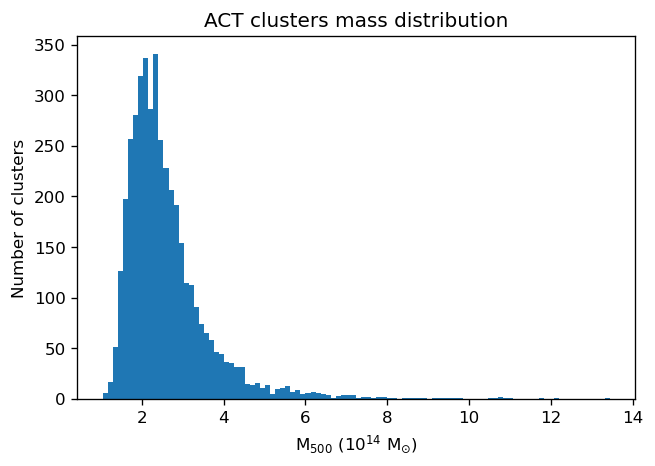

In [44]:
dpi = 120

plt.figure(dpi = dpi)
plt.hist(df_act_clus_small['M500'], bins = 100);
plt.xlabel('M$_{500}$ (10$^{14}$ M$_{\odot}$)')
plt.ylabel('Number of clusters')
plt.title('ACT clusters mass distribution');
# plt.xscale('log')

In [63]:
type(cosmo.comoving_distance(df_act_clus_small['redshift']).value)

numpy.ndarray

In [68]:
from astropy.cosmology import Planck18 as cosmo

# This astropy function will give us a distance in Mpc
df_act_clus_small['r_comov'] = cosmo.comoving_distance(df_act_clus_small['redshift']).value;
df_act_clus_small.describe()

,RADeg,decDeg,redshift,M500,r_comov
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,151.193567,-11.682177,0.550965,2.621147,2050.633192
std,117.664528,24.306970,0.260175,1.092935,819.352266
min,0.020896,-59.987040,0.035200,1.042072,154.676621
25%,39.386235,-34.828811,0.354170,1.961358,1434.406287
50%,144.342767,-2.252158,0.519816,2.361268,2012.598290
75%,232.604297,8.957936,0.709455,2.937229,2607.246878
max,359.988280,20.486048,1.910000,13.442958,5173.142447


In [71]:
c = SkyCoord(ra = df_act_clus_small['RADeg'] * u.degree, 
             dec = df_act_clus_small['decDeg'] * u.degree, 
             distance = df_act_clus_small['r_comov'] )

df_act_clus_small['x_comov'] = c.cartesian.x.value
df_act_clus_small['y_comov'] = c.cartesian.y.value
df_act_clus_small['z_comov'] = c.cartesian.z.value

df_act_clus_small.head()

,RADeg,decDeg,redshift,M500,r_comov,x_comov,y_comov,z_comov
0,0.020896,-38.626729,0.300599,1.683921,1234.970995,964.795514,0.351871,-770.923375
1,0.061318,-43.955645,0.878131,2.437253,3081.580735,2218.358881,2.374109,-2138.929186
2,0.089905,-28.091255,0.282570,2.700574,1166.454241,1029.043199,1.614707,-549.256755
3,0.113536,-1.044805,0.438800,1.493793,1736.957189,1736.664996,3.441354,-31.672153
4,0.113978,-5.880626,0.201735,1.623578,850.514784,846.037292,1.683023,-87.140492


In [93]:
df_act_clus_small.describe()

,RADeg,decDeg,redshift,M500,r_comov,x_comov,y_comov,z_comov
count,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000,4195.000000
mean,151.193567,-11.682177,0.550965,2.621147,2050.633192,318.987671,219.616443,-382.659816
std,117.664528,24.306970,0.260175,1.092935,819.352266,1599.680360,1106.626053,892.947405
min,0.020896,-59.987040,0.035200,1.042072,154.676621,-4170.040899,-3524.075869,-3823.141694
25%,39.386235,-34.828811,0.354170,1.961358,1434.406287,-1091.760851,-524.758254,-984.745914
50%,144.342767,-2.252158,0.519816,2.361268,2012.598290,723.644358,259.891557,-67.613160
75%,232.604297,8.957936,0.709455,2.937229,2607.246878,1517.502717,992.884047,248.498785
max,359.988280,20.486048,1.910000,13.442958,5173.142447,4421.617253,3457.028008,1366.557544


In [100]:
df_act_clus_small.to_csv('Data/ACT_DR5_Clusters_Comov.csv')

In [95]:
%matplotlib

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 10000

# df_north_pos_z_sample = df_north_pos_z.sample(n = no_gal_show, replace = False, 
#                                                random_state = 0)  

ax.scatter(df_act_clus_small['x_comov'], 
           df_act_clus_small['y_comov'], 
           df_act_clus_small['z_comov'],
           s = 0.2, alpha = 0.8);

ax.set_xlabel('X (Mpc)', labelpad = 4)
ax.set_ylabel('Y (Mpc)', labelpad = 8)
ax.set_zlabel('Z (Mpc)', labelpad = 8)

low_lim, high_lim = -4500, 4500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

plt.title('Distribution of ACT clusters')

plt.show()

Using matplotlib backend: Qt5Agg


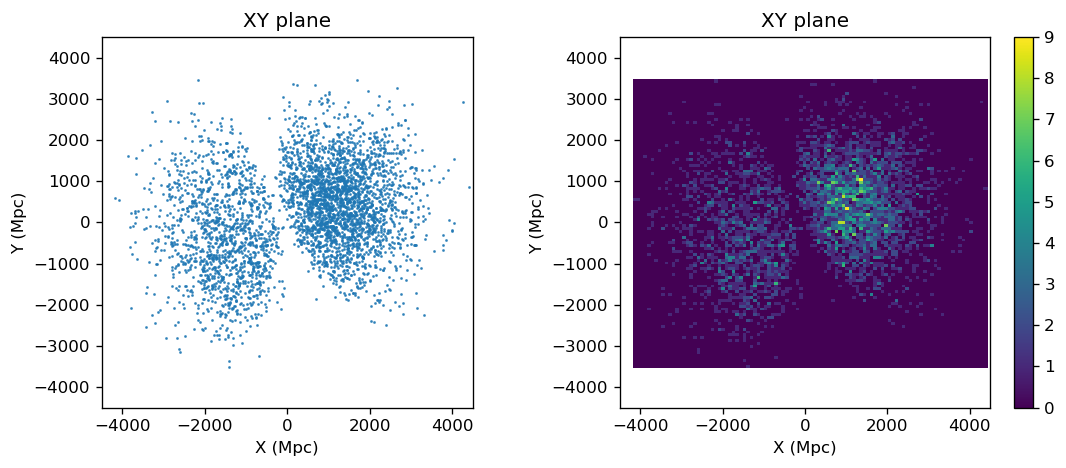

In [97]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_act_clus_small['x_comov'], 
            df_act_clus_small['y_comov'],
            s = 0.5, alpha = 0.8)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -4500, 4500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc)')
plt.ylabel('Y (Mpc)')
plt.title('XY plane');

plt.subplot(122)
plt.hist2d(df_act_clus_small['x_comov'], 
           df_act_clus_small['y_comov'],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-4000, 4000 + 1, 2000))
plt.xlabel('X (Mpc)')
plt.ylabel('Y (Mpc)')
plt.title('XY plane')
plt.colorbar()

plt.tight_layout();

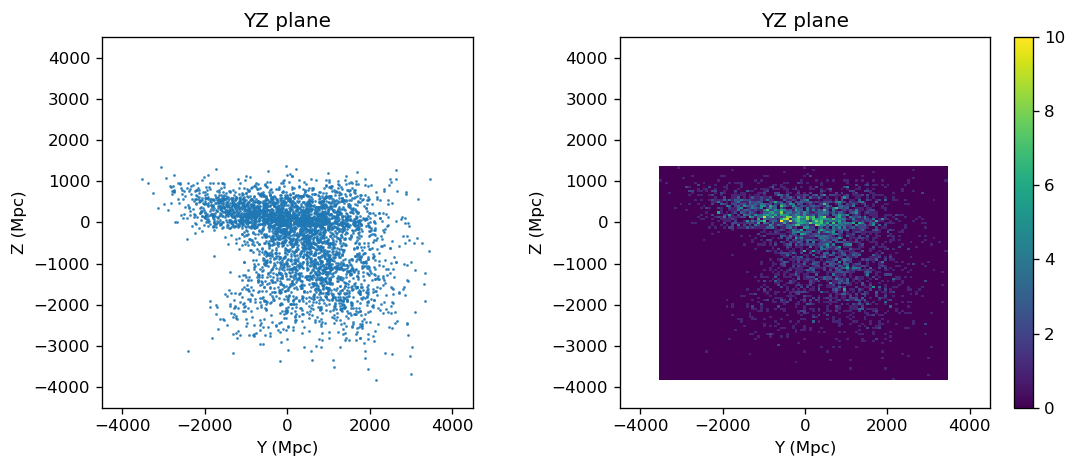

In [98]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_act_clus_small['y_comov'], 
            df_act_clus_small['z_comov'],
            s = 0.5, alpha = 0.8)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -4500, 4500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc)')
plt.ylabel('Z (Mpc)')
plt.title('YZ plane');

plt.subplot(122)
plt.hist2d(df_act_clus_small['y_comov'], 
           df_act_clus_small['z_comov'],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-4000, 4000 + 1, 2000))
plt.xlabel('Y (Mpc)')
plt.ylabel('Z (Mpc)')
plt.title('YZ plane')
plt.colorbar()

plt.tight_layout();

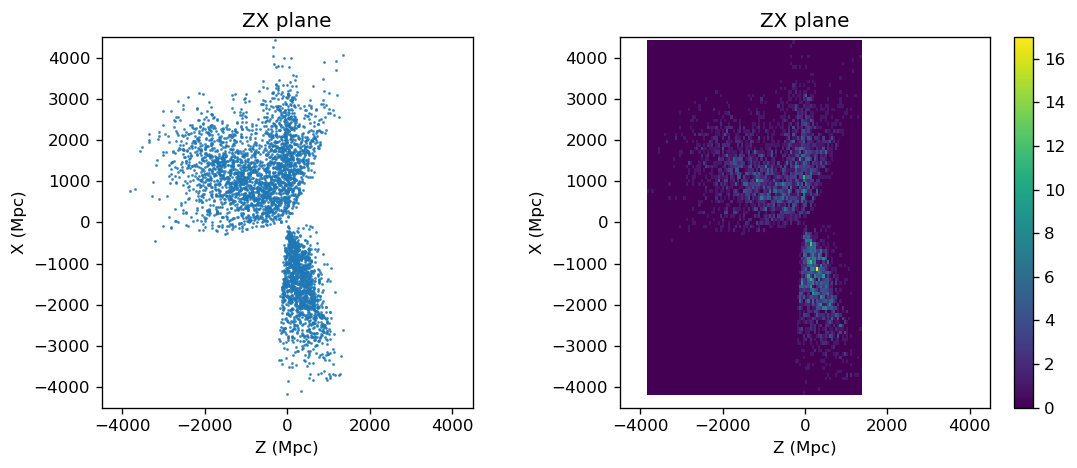

In [99]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_act_clus_small['z_comov'], 
            df_act_clus_small['x_comov'],
            s = 0.5, alpha = 0.8)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -4500, 4500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc)')
plt.ylabel('X (Mpc)')
plt.title('ZX plane');

plt.subplot(122)
plt.hist2d(df_act_clus_small['z_comov'], 
           df_act_clus_small['x_comov'],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-4000, 4000 + 1, 2000))
plt.xlabel('Z (Mpc)')
plt.ylabel('X (Mpc)')
plt.title('ZX plane')
plt.colorbar()

plt.tight_layout();